# Evaluation of `ProfilePV`

In [ ]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import ipywidgets as widgets
from rich.pretty import pprint

from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _pointwise_mse

In [ ]:
folder = "../data/output/driven"
folder = folder + '/paper_DT_2025/profiloPV'
path = Path(folder)

In [ ]:
grounds = [f for f in os.listdir(path) if f.startswith('ground')]
sorted(grounds)
df_ground = pd.concat((pd.read_csv(path / f) for f in sorted(grounds)), ignore_index=True)

In [ ]:
df_sim_dict = {}
sim_datasets = [f for f in os.listdir(path) if not f.startswith('ground')]

sim_datasets.remove('.DS_Store')
sim_datasets.remove('plots')

for f in sim_datasets:
    df_sim_dict[f.split('.')[0]] = pd.read_csv(path / f)

In [ ]:
df_sim_dict.keys()

In [ ]:
vars_to_compare = ['voltage', 'temperature']
ground_dict = {}

for key, df_sim in df_sim_dict.items():
    sim_dict = {}
    print("{}: ".format(key))
    
    for var in vars_to_compare:
        ground_dict[var] = df_ground[var].values
        #sim_dict[var] = df_sim[df_sim['time'].isin(df_ground['time'].values)][var].values
        sim_dict[var] = df_sim[var].values[1:]

    pprint(compute_metrics(ground=ground_dict, 
                           simulated=sim_dict, 
                           vars=vars_to_compare, 
                           metrics=['mse', 'mae', 'mape', 'max_abs_err'], 
                           steps=None)
          )

In [ ]:
comparison_params = {
    'dfs': [df_ground] + list(df_sim_dict.values()), 
    'variables': ['voltage', 'temperature'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': ['Ground', '1-RC', '2-RC'],
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[V]', '[K]'],
    'markers': [''] * 5,
    'line_styles': ['-', '-', (0, (5, 5))],
    'save_fig': False,
    'sampling_rate': 1,
    'colors': ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'pv_test',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'figsize': (12, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
    'alphas':[1, 1, 1]
}

In [ ]:
ernesto_plotter(**comparison_params)

In [ ]:
single_param = {
    'dfs': [df_ground], 
    'variables': ['power'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': None,
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[W]'],
    'markers': [''] * 5,
    'line_styles': ['-'] * 5,
    'save_fig': True,
    'sampling_rate': 1,
    #'colors': ['cyan', 'violet'],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'pv_profile',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'figsize': (15, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
    'figsize': (12, 4)
}

In [ ]:
ernesto_plotter(**single_param)

# Evaluation of `Checkup` profile

In [ ]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import ipywidgets as widgets
from rich.pretty import pprint

from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _mse

In [ ]:
folder = "../data/output/driven"
folder = folder + '/paper_dic24/20C_check_up/1-rc'
path = Path(folder)

In [ ]:
grounds = [f for f in os.listdir(path) if f.startswith('ground')]
sorted(grounds)
df_ground = pd.concat((pd.read_csv(path / f) for f in sorted(grounds)), ignore_index=True)

In [ ]:
df_sim_dict = {}
sim_datasets = [f for f in os.listdir(path) if not f.startswith('ground')]

sim_datasets.remove('.DS_Store') if '.DS_Store' in sim_datasets else None
sim_datasets.remove('plots') if 'plots' in sim_datasets else None

for f in sim_datasets:
    df_sim_dict[f.split('.')[0]] = pd.read_csv(path / f)

In [ ]:
df_sim_dict.keys()

In [ ]:
vars_to_compare = ['voltage', 'temperature']
ground_dict = {}

for key, df_sim in df_sim_dict.items():
    sim_dict = {}
    print("{}: ".format(key))
    
    for var in vars_to_compare:
        ground_dict[var] = df_ground[var].values
        #sim_dict[var] = df_sim[df_sim['time'].isin(df_ground['time'].values)][var].values
        sim_dict[var] = df_sim[var].values[1:]

    pprint(compute_metrics(ground=ground_dict, 
                           simulated=sim_dict, 
                           vars=vars_to_compare, 
                           metrics=None, steps=None)
          )

In [ ]:
comparison_params = {
    'dfs': [df_ground] + list(df_sim_dict.values()), 
    'variables': ['voltage', 'temperature'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': ['Ground', '1-rc', '2-rc'],
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[V]', '[K]'],
    'markers': [''] * 5,
    'line_styles': ['-'] * 5,
    'save_fig': False,
    'sampling_rate': 100,
    #'colors': ['cyan', 'violet'],
    'plot_type': 'scatter',
    'dest': path, 
    'fig_name': 'pv_test',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'figsize': (15, 4),
    'tick_font_size': 18,
    'label_font_size': 20,
    'legend_font_size': 18,
    'figsize': (15, 4)
}

In [ ]:
ernesto_plotter(**comparison_params)

In [ ]:
single_param = {
    'dfs': [df_ground], 
    'variables': ['current'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': None,
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[A]'],
    'markers': [''] * 5,
    'line_styles': ['-'] * 5,
    'save_fig': False,
    'sampling_rate': 1,
    #'colors': ['cyan', 'violet'],
    'plot_type': 'scatter',
    'dest': path, 
    'fig_name': 'checkup_profile',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'figsize': (15, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
    'figsize': (12, 4)
}

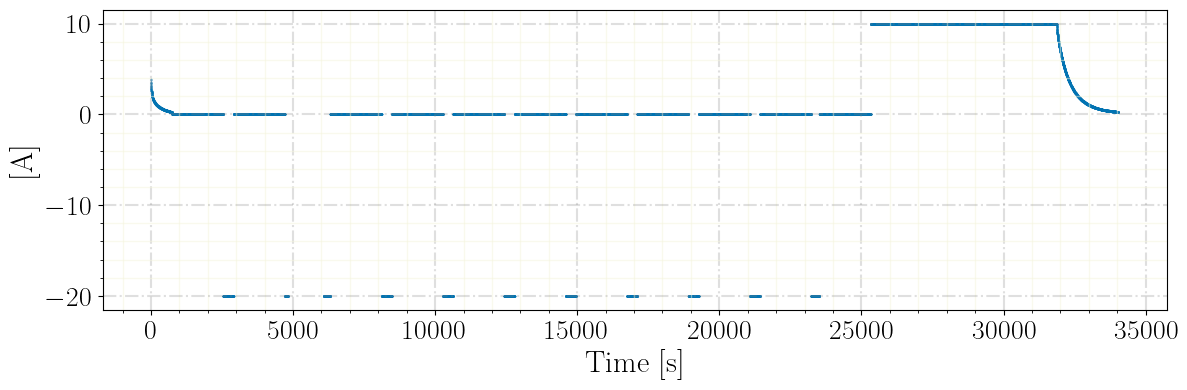

In [152]:
ernesto_plotter(**single_param)

# Evaluation of `SaltoTermico`

In [33]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import ipywidgets as widgets
from rich.pretty import pprint
import seaborn as sns

from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _mse

In [34]:
folder = "../data/output/driven"
folder = folder + '/paper_DT_2025/salto_termico'
path = Path(folder)

In [35]:
grounds = [f for f in os.listdir(path) if f.startswith('ground')]
sorted(grounds)
df_ground = pd.concat((pd.read_csv(path / f) for f in sorted(grounds)), ignore_index=True)

In [36]:
df_sim_dict = {}
sim_datasets = [f for f in os.listdir(path) if not f.startswith('ground')]

sim_datasets.remove('.DS_Store') if '.DS_Store' in sim_datasets else None
sim_datasets.remove('plots') if 'plots' in sim_datasets else None

for f in sim_datasets:
    df_sim_dict[f.split('.')[0]] = pd.read_csv(path / f)

In [37]:
df_sim_dict.keys()

dict_keys(['1rc-only_soc', '2rc-only_soc', '1rc', '2rc'])

In [61]:
# vars_to_compare = ['voltage', 'temperature']
ground_dict = {}

for key, df_sim in df_sim_dict.items():
    sim_dict = {}
    print("{}: ".format(key))
    
    for var in vars_to_compare:
        ground_dict[var] = df_ground[var].values[19500:]
        #sim_dict[var] = df_sim[df_sim['time'].isin(df_ground['time'].values)][var].values
        sim_dict[var] = df_sim[var].values[19501:]

    pprint(compute_metrics(ground=ground_dict, 
                           simulated=sim_dict, 
                           vars=vars_to_compare, 
                           metrics=None, 
                           steps=None)
          )

1rc-only_soc: 


{
│   'voltage': {
│   │   'mse': 0.0008970868617163207,
│   │   'mae': 0.027515901972163408,
│   │   'mape': 0.7214686175841598,
│   │   'max_abs_err': 0.04599650684290557
│   },
│   'temperature': {
│   │   'mse': 703.1146977856549,
│   │   'mae': 26.052233875417514,
│   │   'mape': 9.104893525246863,
│   │   'max_abs_err': 28.48230000000001
│   }
}

2rc-only_soc: 


{
│   'voltage': {
│   │   'mse': 0.0009246328783953683,
│   │   'mae': 0.02801652977963342,
│   │   'mape': 0.7346269210917667,
│   │   'max_abs_err': 0.046065972511413644
│   },
│   'temperature': {
│   │   'mse': 703.1607420981436,
│   │   'mae': 26.053104124868263,
│   │   'mape': 9.105197130195805,
│   │   'max_abs_err': 28.483374852179907
│   }
}

1rc: 


{
│   'voltage': {
│   │   'mse': 0.00027299817199338193,
│   │   'mae': 0.014346866468786449,
│   │   'mape': 0.37592304007376387,
│   │   'max_abs_err': 0.030207404205134125
│   },
│   'temperature': {
│   │   'mse': 1.9901340653134498,
│   │   'mae': 0.600448380208281,
│   │   'mape': 0.2026946877142985,
│   │   'max_abs_err': 6.456309512992675
│   }
}

2rc: 


{
│   'voltage': {
│   │   'mse': 0.00029392686581736433,
│   │   'mae': 0.015365829764036184,
│   │   'mape': 0.40278225401825263,
│   │   'max_abs_err': 0.02953867681098643
│   },
│   'temperature': {
│   │   'mse': 1.9901922954658642,
│   │   'mae': 0.6004683493565816,
│   │   'mape': 0.2027016405111315,
│   │   'max_abs_err': 6.456431327285543
│   }
}

In [39]:
colors = sns.color_palette('colorblind', 10)
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [40]:
temp_params = {
    'dfs': [df_ground],
    'variables': ['t_amb'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': None,
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['[K]'],
    'markers': ['', '', ''] ,
    'line_styles': ['-', '-', '-'],
    'save_fig': False,
    'sampling_rate': 1,
    'colors': [colors[9]],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'pv_thermal-jump-t_amb',
    'pic_format': 'pdf',
    'figsize': (12, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
}

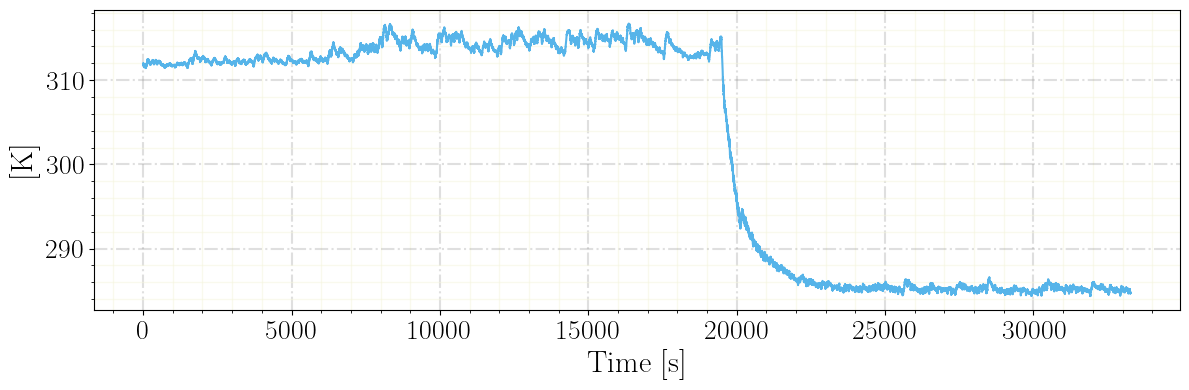

In [41]:
ernesto_plotter(**temp_params)

In [123]:
comparison_params = {
    'dfs': [df_ground, df_sim_dict['1rc'], df_sim_dict['1rc-only_soc']],
    'variables': ['voltage'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': ['Ground', '1-RC', '1-RC w/o temp'],
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['[V]'],
    'markers': ['', '', ''] ,
    'line_styles': ['-', '-', '-'],
    'save_fig': False,
    'sampling_rate': 1,
    'colors': [colors[0], colors[1], colors[3]],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'pv_thermal-jump-1rc',
    'pic_format': 'pdf',
    'figsize': (12, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
}

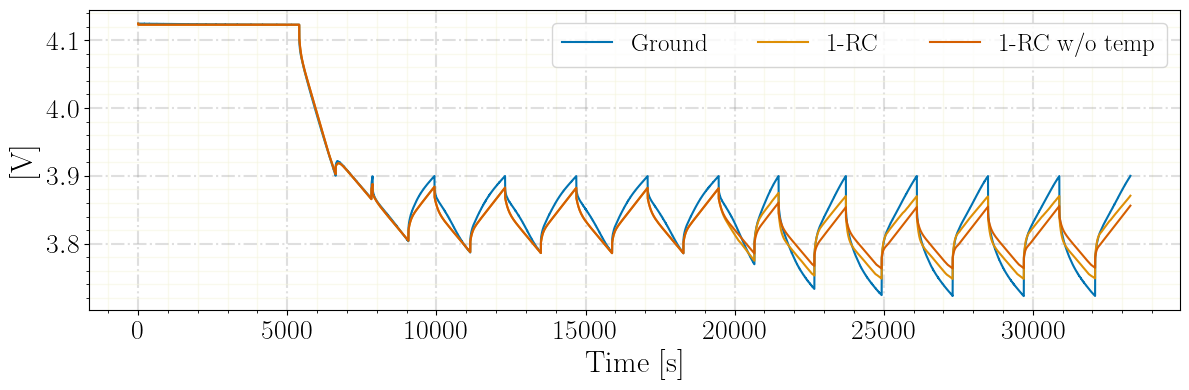

In [124]:
ernesto_plotter(**comparison_params)

In [125]:
comparison_params = {
    'dfs': [df_ground, df_sim_dict['2rc'], df_sim_dict['2rc-only_soc']],
    'variables': ['voltage'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': ['Ground', '2-RC', '2-RC w/o temp'],
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['[V]'],
    'markers': ['', '', ''] ,
    'line_styles': ['-', '-', '-'],
    'save_fig': False,
    'sampling_rate': 1,
    'colors': [colors[0], colors[2], colors[4]],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'pv_thermal-jump-2rc',
    'pic_format': 'pdf',
    'figsize': (12, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
}

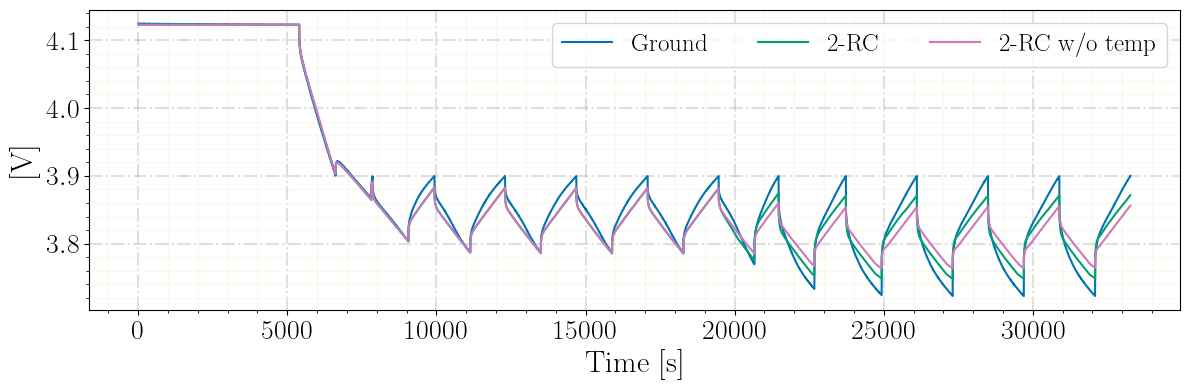

In [126]:
ernesto_plotter(**comparison_params)

# Evaluation of `TestFacility`

In [127]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import ipywidgets as widgets
from rich.pretty import pprint

from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _mse

In [128]:
folder = "../data/output/driven"
folder = folder + '/paper_DT_2025/test_facility'
path = Path(folder)

In [129]:
grounds = [f for f in os.listdir(path) if f.startswith('ground')]
sorted(grounds)
df_ground = pd.concat((pd.read_csv(path / f) for f in sorted(grounds)), ignore_index=True)

In [130]:
df_sim_dict = {}
sim_datasets = [f for f in os.listdir(path) if not f.startswith('ground')]

sim_datasets.remove('.DS_Store') if '.DS_Store' in sim_datasets else None
sim_datasets.remove('plots') if 'plots' in sim_datasets else None

for f in sim_datasets:
    df_sim_dict[f.split('.')[0]] = pd.read_csv(path / f)

In [131]:
df_sim_dict.keys()

dict_keys(['1rc', '2rc'])

In [132]:
vars_to_compare = ['voltage', 'temperature']
ground_dict = {}

for key, df_sim in df_sim_dict.items():
    sim_dict = {}
    print("{}: ".format(key))
    
    for var in vars_to_compare:
        ground_dict[var] = df_ground[var].values
        #sim_dict[var] = df_sim[df_sim['time'].isin(df_ground['time'].values)][var].values
        sim_dict[var] = df_sim[var].values[1:]

    pprint(compute_metrics(ground=ground_dict, 
                           simulated=sim_dict, 
                           vars=vars_to_compare, 
                           metrics=None, steps=None)
          )

1rc: 


{
│   'voltage': {
│   │   'mse': 6.264149993895792e-05,
│   │   'mae': 0.007192312472115534,
│   │   'mape': 0.18271753817961522,
│   │   'max_abs_err': 0.016609446778174775
│   },
│   'temperature': {
│   │   'mse': 0.015403151799309601,
│   │   'mae': 0.09940213458335953,
│   │   'mape': 0.03373386273671922,
│   │   'max_abs_err': 0.46728015017868074
│   }
}

2rc: 


{
│   'voltage': {
│   │   'mse': 6.244919507691762e-05,
│   │   'mae': 0.007190458377358393,
│   │   'mape': 0.1826637633635191,
│   │   'max_abs_err': 0.01647175917309207
│   },
│   'temperature': {
│   │   'mse': 0.015403096914105343,
│   │   'mae': 0.0994018787937663,
│   │   'mape': 0.03373377593620524,
│   │   'max_abs_err': 0.46728002845162564
│   }
}

In [135]:
comparison_params = {
    'dfs': [df_ground] + list(df_sim_dict.values()), 
    'variables': ['voltage', 'temperature'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': ['Ground', '1-RC', '2-RC'],
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[V]', '[K]'],
    'markers': [''] * 5,
    'line_styles': ['-', '-', (0, (5, 5))],
    'save_fig': True,
    'sampling_rate': 1,
    #'colors': ['cyan', 'violet'],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'test_facility',
    'pic_format': 'pdf',
    'figsize': (12, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
}

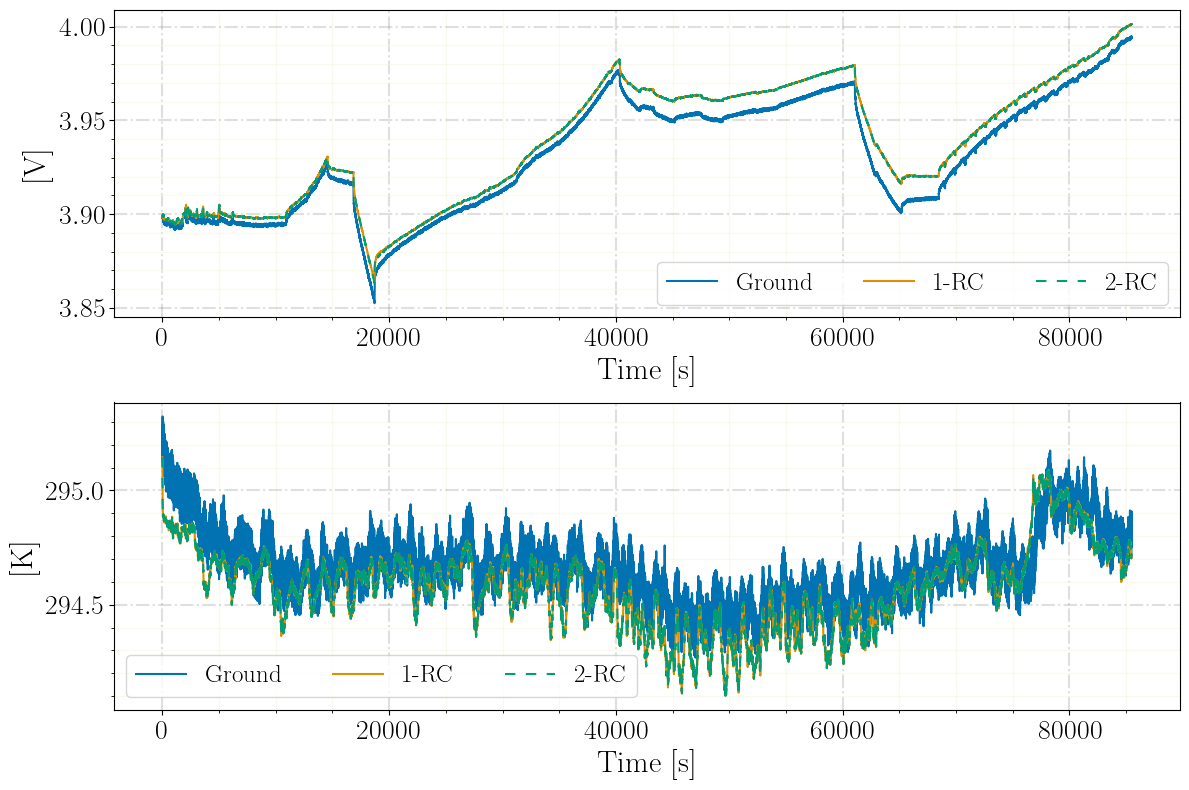

In [136]:
ernesto_plotter(**comparison_params)

In [37]:
single_param = {
    'dfs': [df_ground], 
    'variables': ['power'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': None,
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[W]'],
    'markers': [''] * 5,
    'line_styles': ['-'] * 5,
    'save_fig': True,
    'sampling_rate': 1,
    #'colors': ['cyan', 'violet'],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'test_facility_profile',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
    'figsize': (12, 4)
}

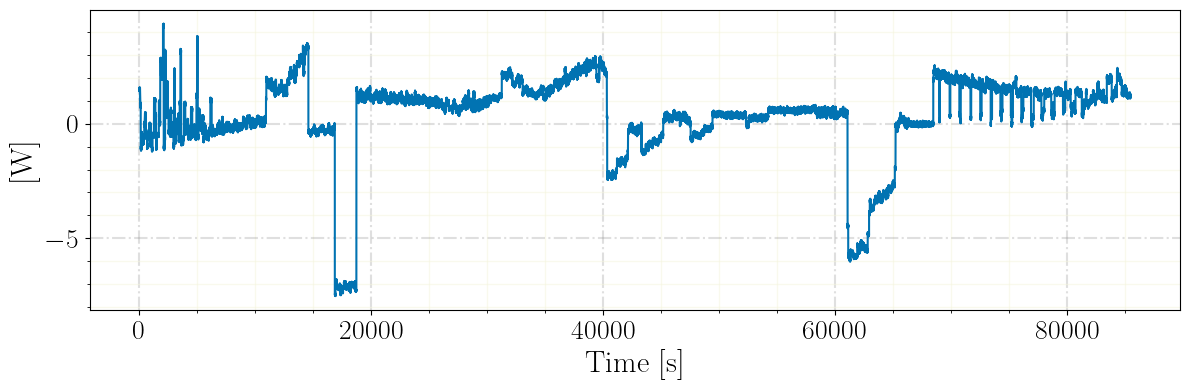

In [38]:
ernesto_plotter(**single_param)

# Evaluation of `Aging`